# 1. 데이터 탐색: 단변량

In [8]:
import pandas as pd
data=pd.read_csv('Ex_CEOSalary.csv', encoding='utf-8')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
salary      209 non-null int64
sales       209 non-null float64
roe         209 non-null float64
industry    209 non-null int64
dtypes: float64(2), int64(2)
memory usage: 6.6 KB


In [10]:
data.head(2)

,salary,sales,roe,industry
0,1095,27595.0,14.1,1
1,1001,9958.0,10.9,1


## 1-1. 범주형 자료의 탐색

In [11]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [12]:
data['industry'] = data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Car', 'Others'])
data['industry'].value_counts()

Service    72
Car        60
IT         46
Others     31
Name: industry, dtype: int64

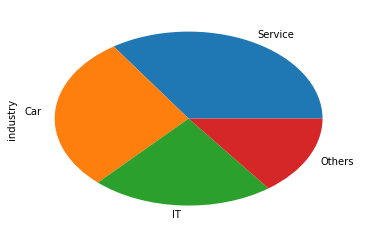

In [13]:
# 파이 차트
%matplotlib inline
data['industry'].value_counts().plot(kind="pie")

<AxesSubplot:>

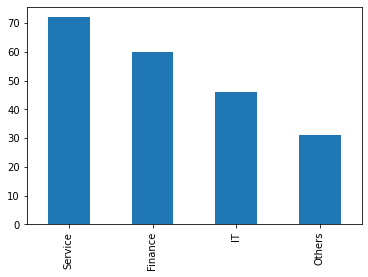

In [7]:
# bar 차트
data['industry'].value_counts().plot(kind="bar")

## 1-2. 연속형 자료의 탐색

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
salary      209 non-null int64
sales       209 non-null float64
roe         209 non-null float64
industry    209 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 5.8+ KB


In [16]:
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [17]:
## 왜도
# 2보다 크면 우측꼬리분포로 왼쪽에 자료가 많음
# 2보다 작으면 왼쪽꼬리분포로 오른쪽에 자료가 많음
data.skew()

salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

In [18]:
## 첨도
# + 일수록 중심에 자료가 몰려있고 - 일수록 가장자리에 자료가 많음
# 0이면 정규분포
data.kurtosis()

salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64